## EEE485 - Project Phase I

### Imports

In [2]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import smote

### Load Data

In [3]:
raw_data = pd.read_csv("data.csv")
bankrupt_pd = raw_data["Bankrupt?"]
features_pd = raw_data.drop(["Bankrupt?"], axis=1)
bankrupt = bankrupt_pd.to_numpy()
features = features_pd.to_numpy()
raw_data

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

### Check for NAN and Duplicate Values


In [4]:
print("NAN values:", [col for col in features_pd if features_pd[col].isna().sum() > 0])
print("Duplicates:", features_pd.duplicated().sum())

NAN values: []
Duplicates: 0


We now know that we do not have any missing or duplicate data

### Evaluate Data Imbalance

In [5]:
print("Data Size:", bankrupt.shape[0])
print("# of stable companies:", np.sum(bankrupt == 0) )
print("# of unstable companies:", np.sum(bankrupt == 1) )
print("unstable to stable ratio: ", np.sum(bankrupt == 1)/np.sum(bankrupt == 0)*100, "%", sep="")

Data Size: 6819
# of stable companies: 6599
# of unstable companies: 220
unstable to stable ratio: 3.3338384603727835%


### PLOTS

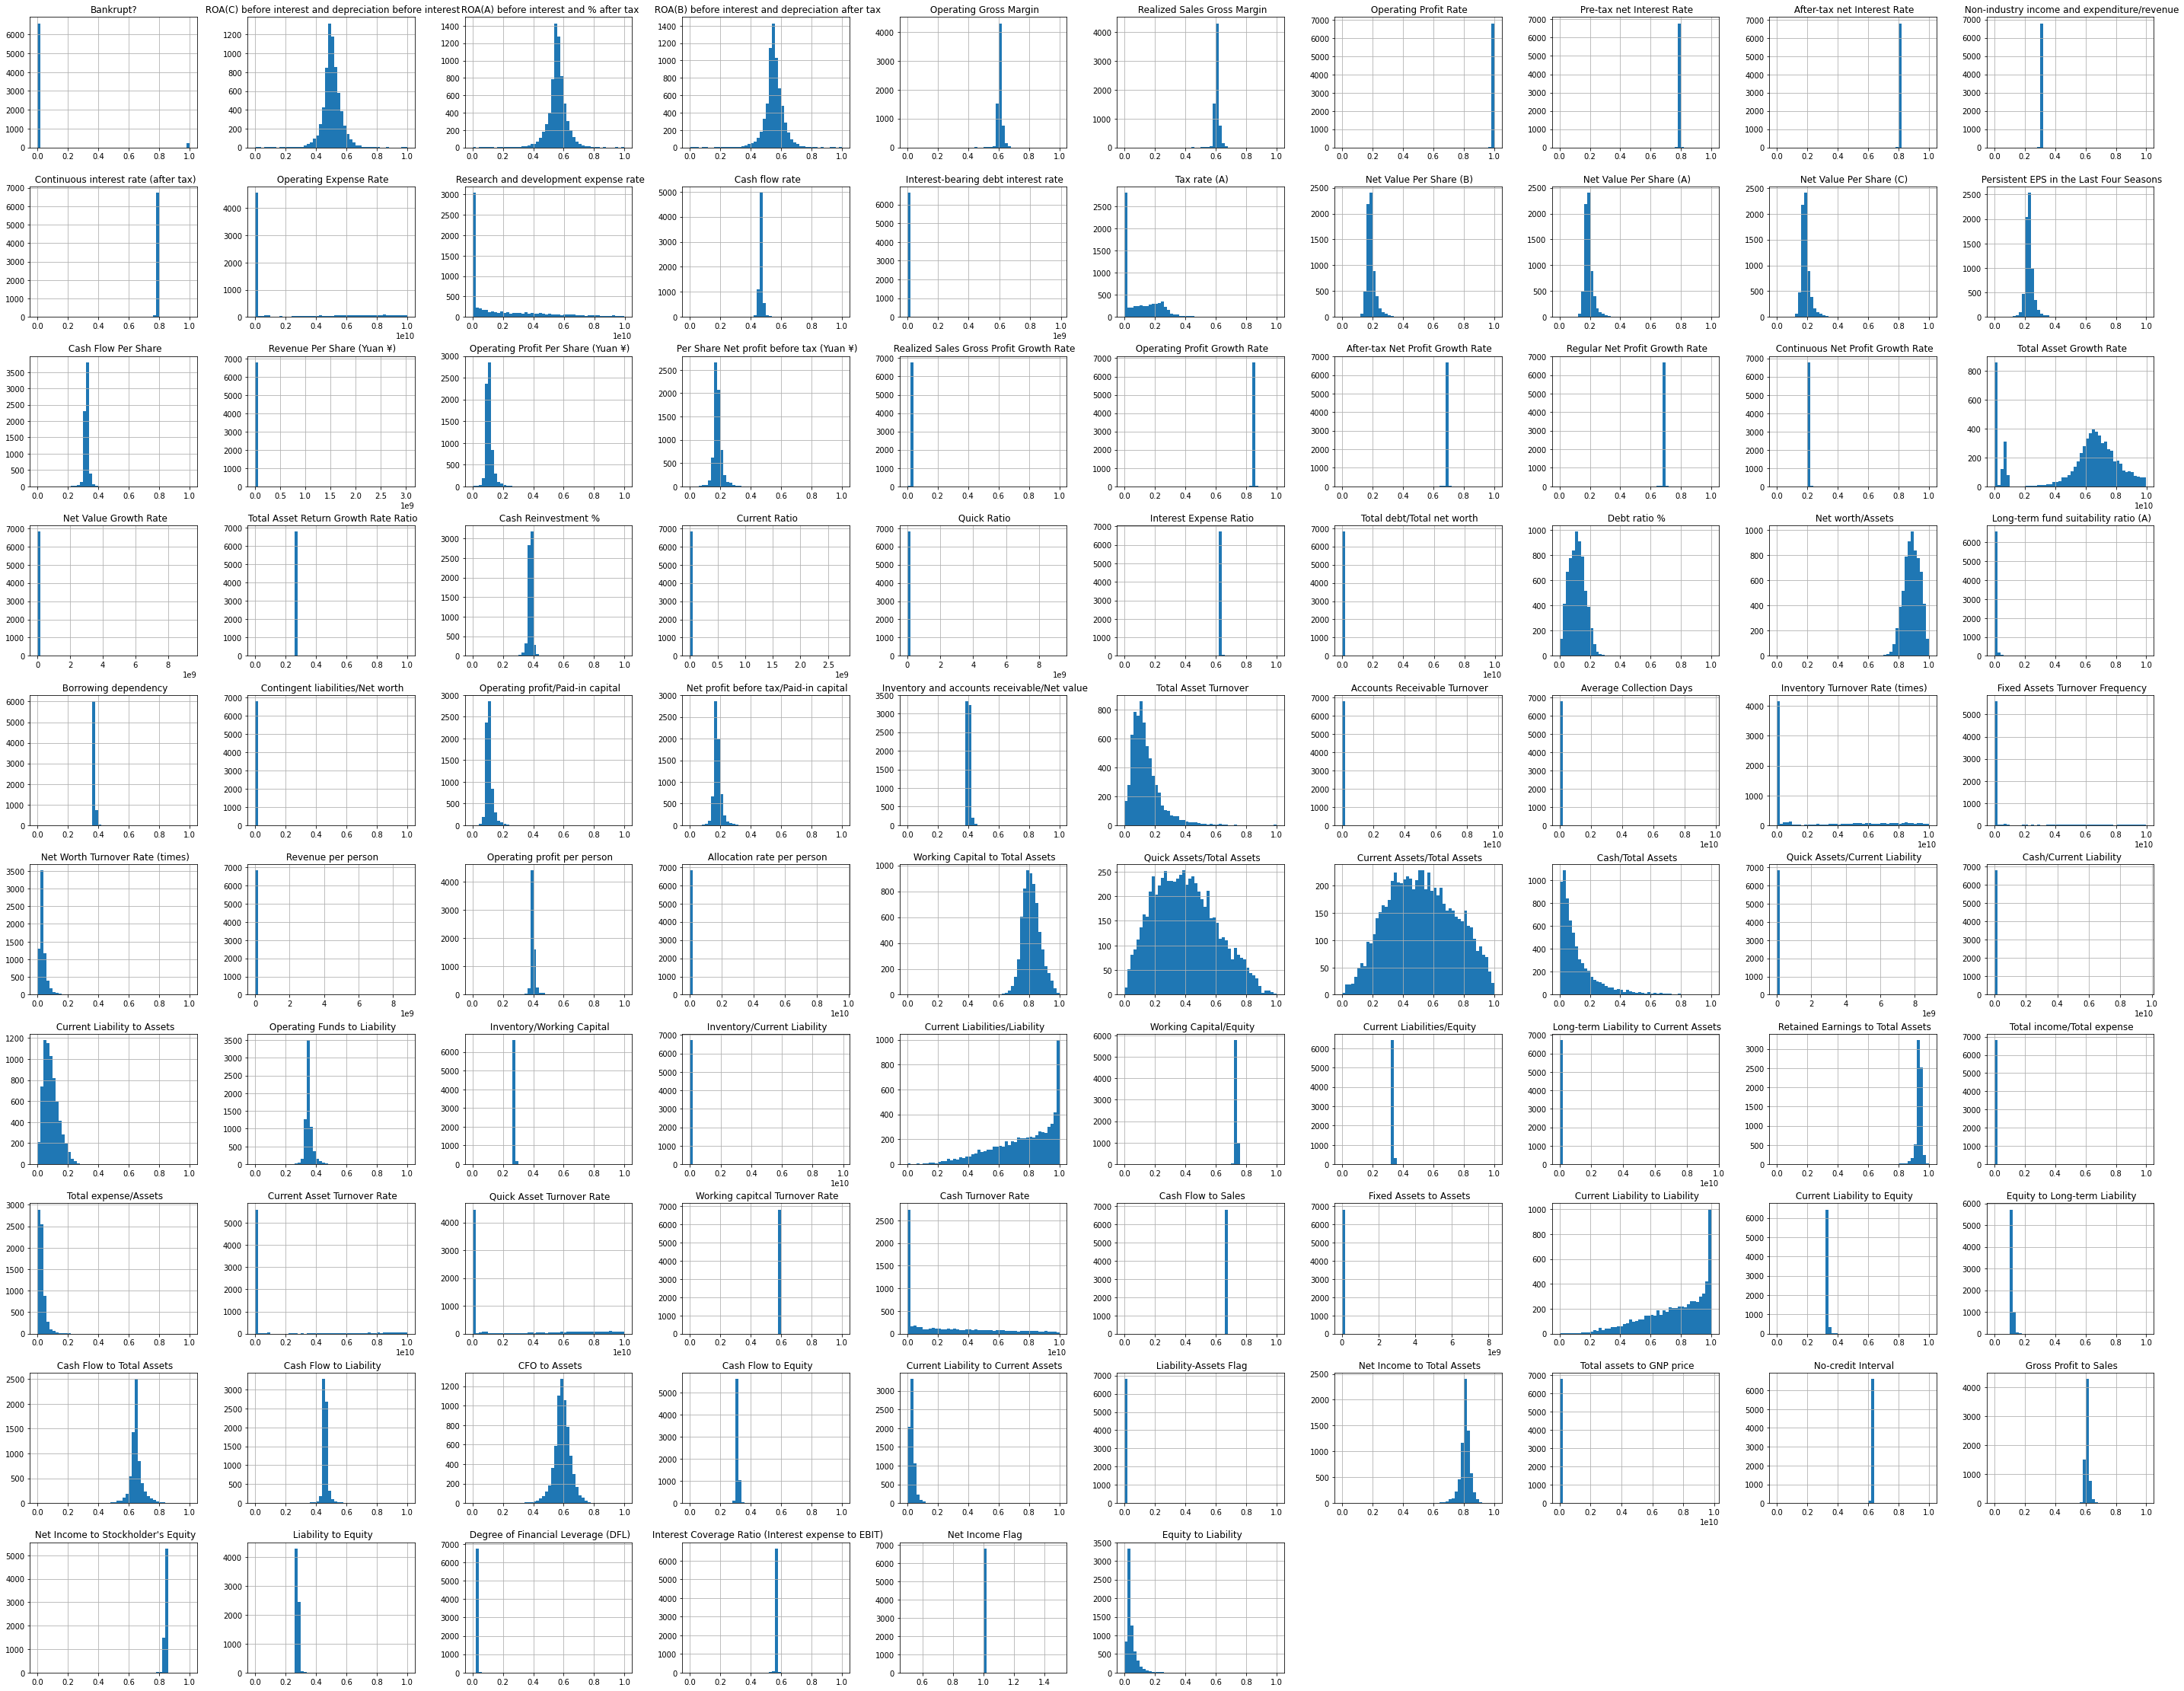

In [6]:
raw_data.hist(figsize = (50,40), bins = 50)
plt.show()

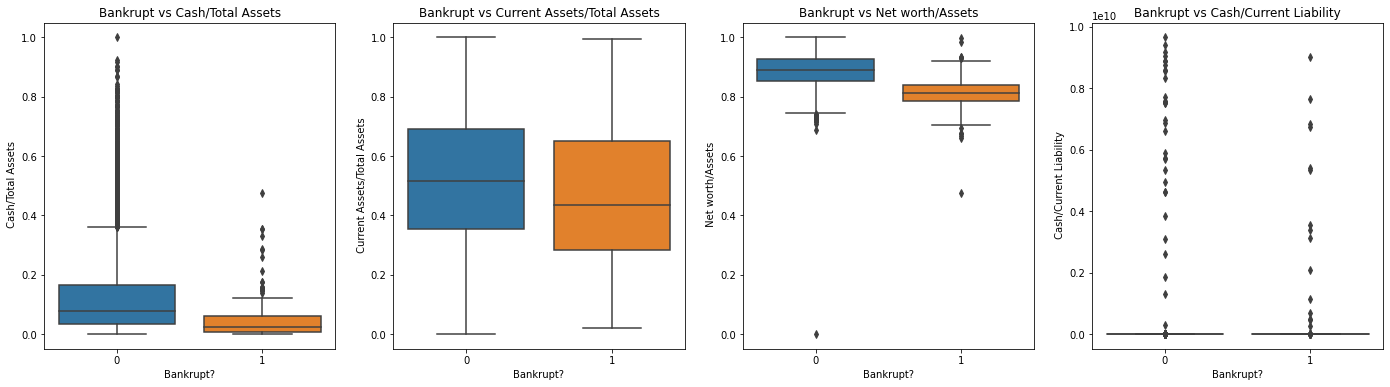

In [7]:
f, axes = plt.subplots(ncols=4, figsize = (24,6) )

sns.boxplot(x="Bankrupt?", y=" Cash/Total Assets", data=raw_data, ax = axes[0] )
axes[0].set_title("Bankrupt vs Cash/Total Assets")

sns.boxplot(x="Bankrupt?", y=" Current Assets/Total Assets", data=raw_data, ax = axes[1] )
axes[1].set_title("Bankrupt vs Current Assets/Total Assets")

sns.boxplot(x="Bankrupt?", y=" Net worth/Assets", data=raw_data, ax = axes[2] )
axes[2].set_title("Bankrupt vs Net worth/Assets")

sns.boxplot(x="Bankrupt?", y=" Cash/Current Liability", data=raw_data, ax = axes[3] )
axes[3].set_title("Bankrupt vs Cash/Current Liability")

plt.show()

### Outlier Removal Using IQR

In [8]:
def remove_outlier(feature, name, data):
    q1 = np.percentile(feature, 25)
    print(q1)
    q3 = np.percentile(feature, 75)
    iqr = q3-q1
    cut_off = iqr*1.5
    lower_limit = q1-cut_off
    upper_limit = q3+cut_off
    for instance in feature:
        if instance<lower_limit or instance>upper_limit:
            data = data.drop(data[(data[name] > upper_limit) | (data[name] < lower_limit)].index)
    return data

In [9]:
for col in features_pd:
    clean_data = remove_outlier(raw_data[col], str(col), raw_data)

0.476527080388047
0.53554295682512
0.527276620804112
0.6004446590466855
0.600433848859165
0.998969203197885
0.797385863236893
0.809311597146491
0.30346627659685
0.7815668165898519
0.0001566874492428
0.000128187953762
0.4615577531181065
0.0002030203020302
0.0
0.173612574269942
0.173612574269942
0.1736757827314485
0.214711165736976
0.317747754120393
0.01563138073415305
0.0960833808321798
0.170369812457634
0.022064532735505453
0.8479841081819834
0.6892699337448115
0.689270265563206
0.2175795122117655
4860000000.0
0.0004409688868264
0.263758926420651
0.37474851905666695
0.00755504663011965
0.004725903227376101
0.63061225188696
0.0030070491250148
0.0728905281615624
0.8511956948937329
0.0052436836906082
0.3701678435547765
0.0053658477137564
0.0961046786197013
0.169376366789835
0.3974026791778925
0.0764617691154423
0.0007101336065656
0.0043865304397204
0.0001728255554827
0.0002330013064716
0.0217741935483871
0.010432854016421151
0.392437981954275


KeyboardInterrupt: 

### Plots with Outliers Removed

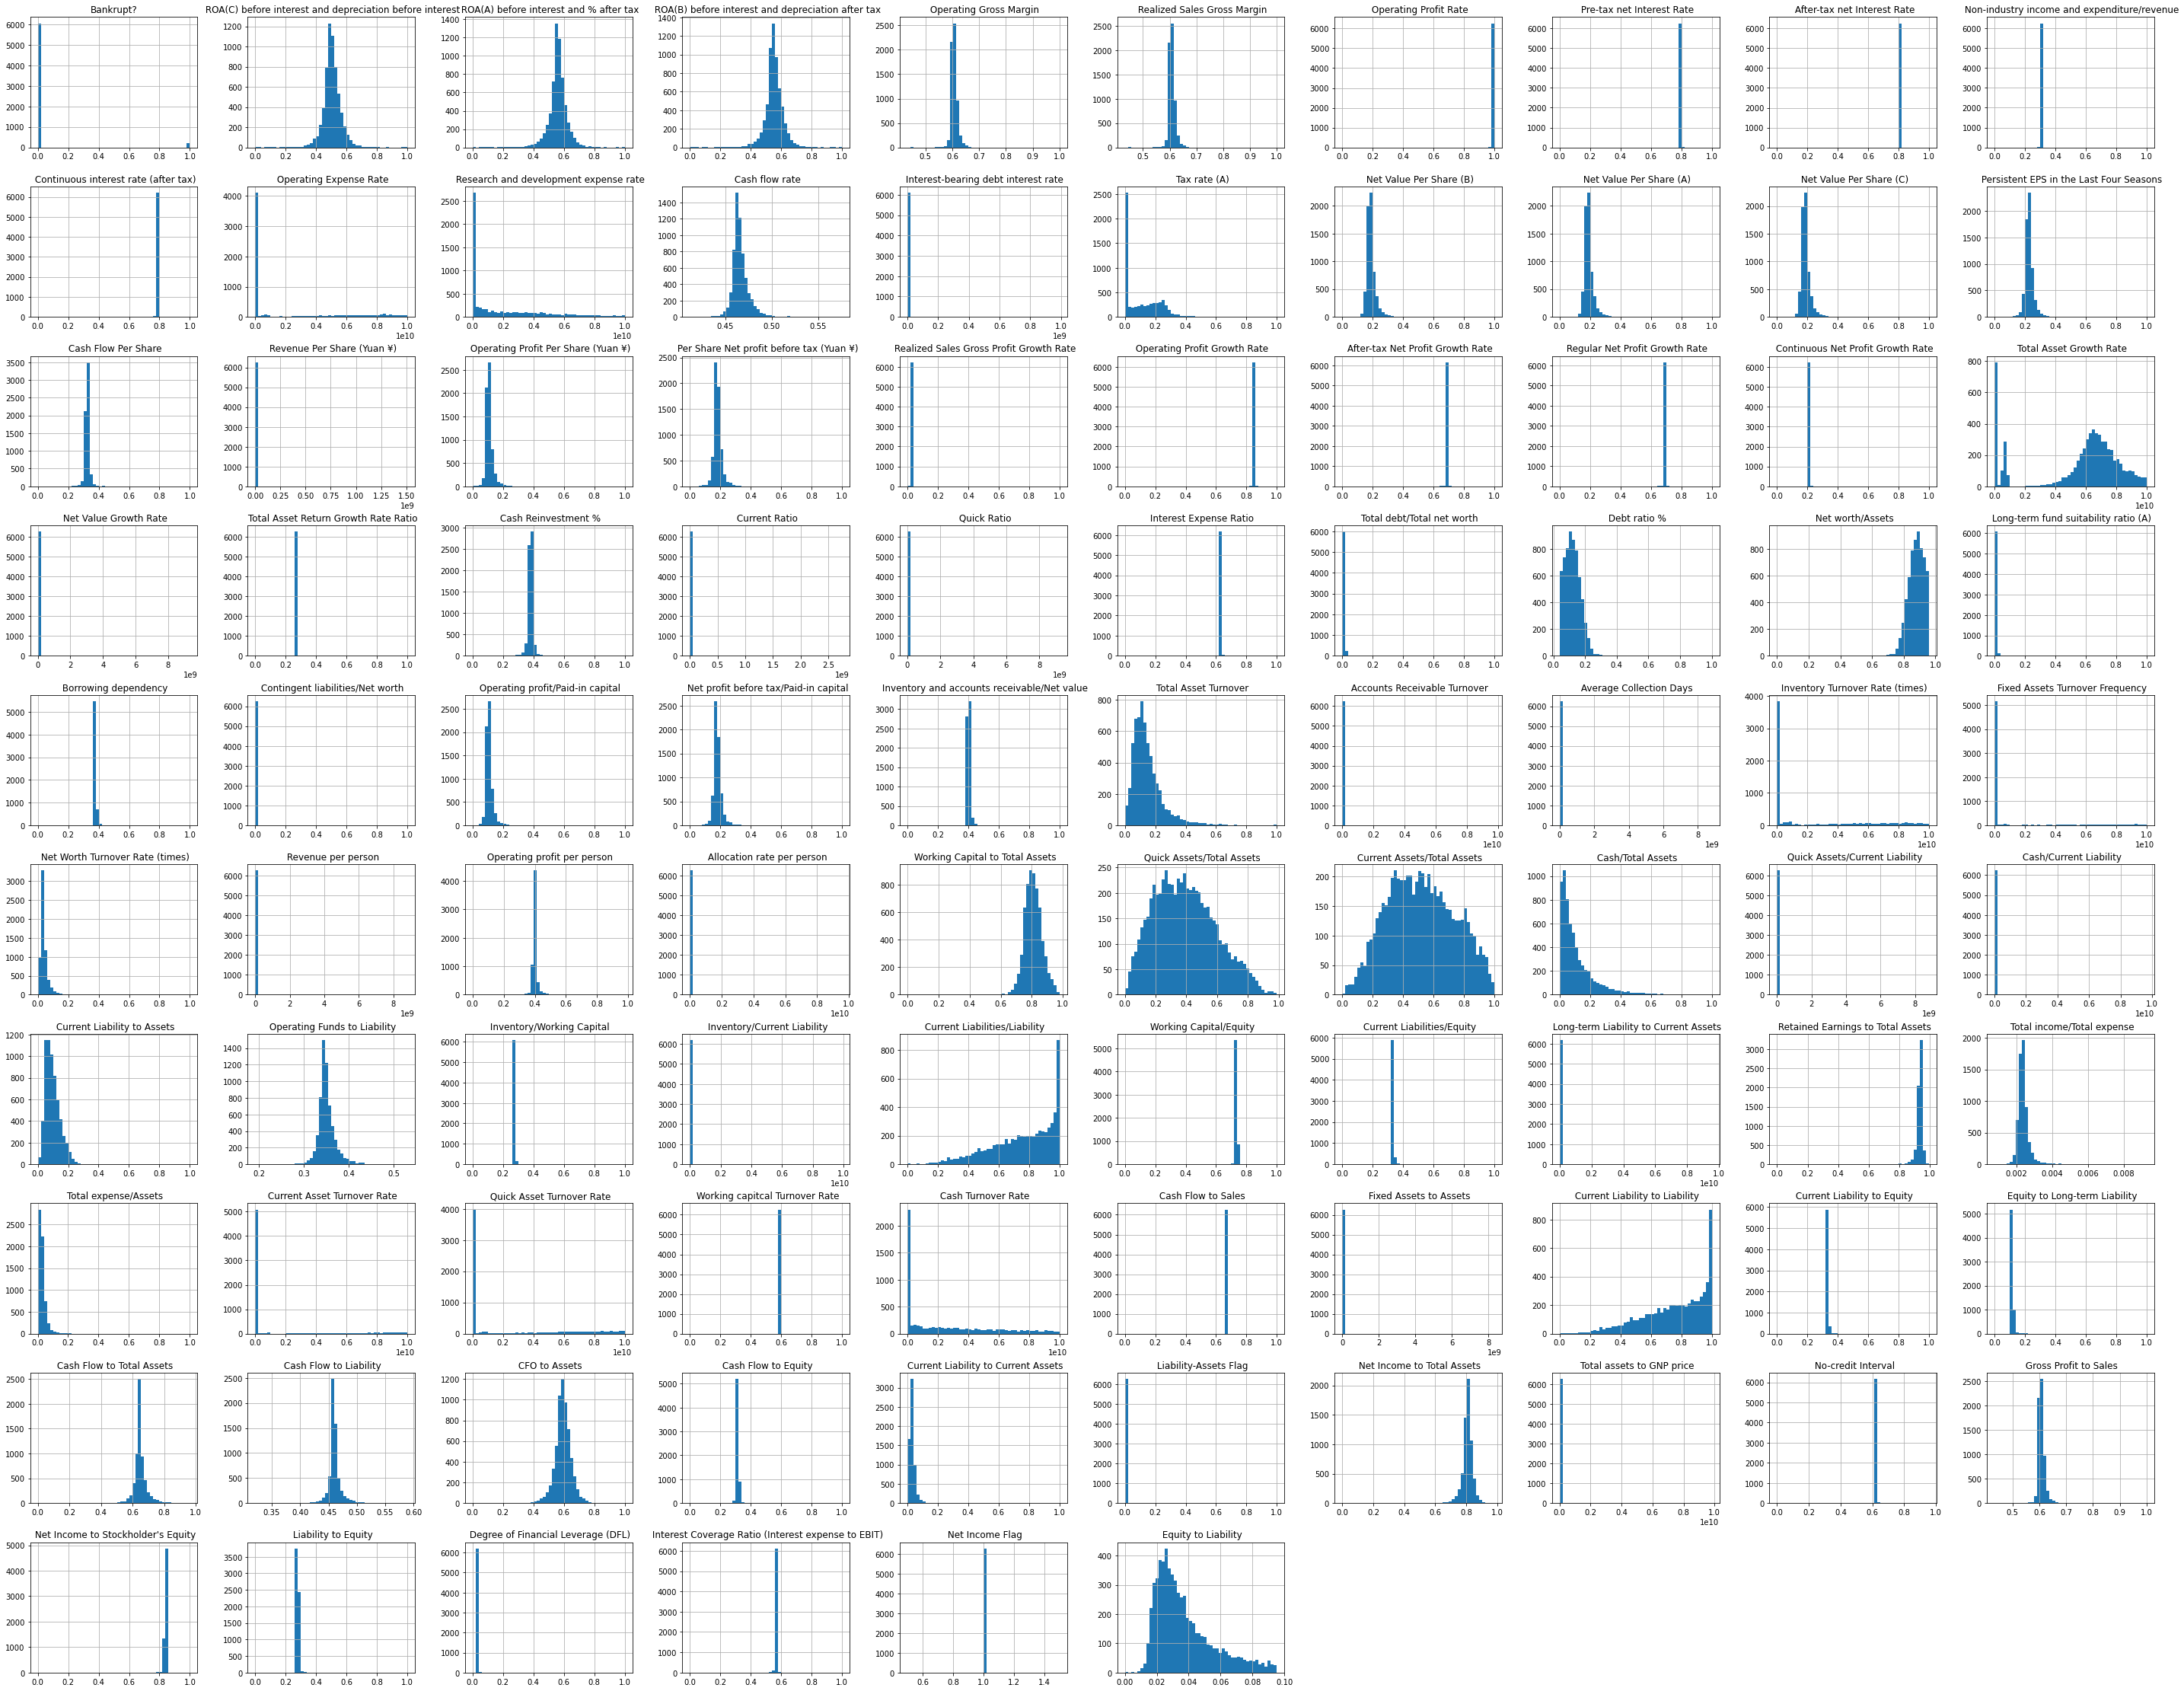

In [89]:

clean_data.hist(figsize = (50,40), bins = 50)
plt.show()

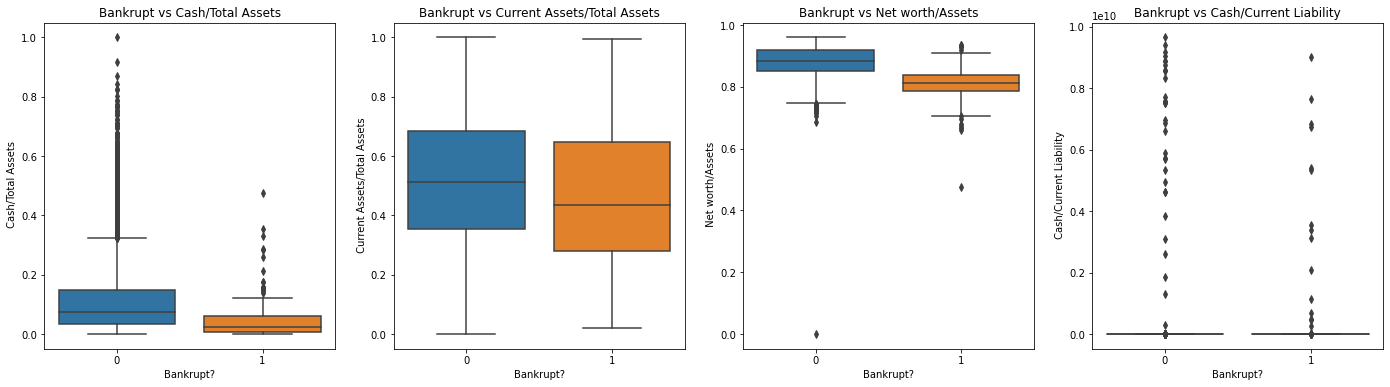

In [90]:
f, axes = plt.subplots(ncols=4, figsize = (24,6) )

sns.boxplot(x="Bankrupt?", y=" Cash/Total Assets", data=clean_data, ax = axes[0] )
axes[0].set_title("Bankrupt vs Cash/Total Assets")

sns.boxplot(x="Bankrupt?", y=" Current Assets/Total Assets", data=clean_data, ax = axes[1] )
axes[1].set_title("Bankrupt vs Current Assets/Total Assets")

sns.boxplot(x="Bankrupt?", y=" Net worth/Assets", data=clean_data, ax = axes[2] )
axes[2].set_title("Bankrupt vs Net worth/Assets")

sns.boxplot(x="Bankrupt?", y=" Cash/Current Liability", data=clean_data, ax = axes[3] )
axes[3].set_title("Bankrupt vs Cash/Current Liability")

plt.show()

### SMOTE

In [ ]:
minority = clean_data[bankrupt_pd == 1]
smote = Smote( minority.to_numpy() )
oversamples = smote.oversample()
smote = smote.Smote()